In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [36]:
#Inicialização dos cromossomos
#0 - 5
cromoT = []
populacao = 10
genes = 4
for i in range(populacao):
    cromo = []
    for j in range(genes):
        cromo.append(random.randint(1,5))
    
    cromoT.append(cromo)
    
print(cromoT)

[[3, 2, 2, 4], [1, 4, 2, 2], [4, 3, 4, 2], [4, 2, 4, 4], [3, 2, 4, 2], [3, 2, 4, 1], [4, 5, 2, 2], [3, 1, 2, 2], [3, 2, 2, 4], [4, 3, 3, 4]]


### Plotando resultados

In [42]:
class genetic:
    
    def __init__(self, n_geracoes=10, populacao=10):
        self.geracoes = n_geracoes
        self.pop = populacao
        self.cromo = []
        self.pontos = []
        self.final_pont_max = []
        self.pontos_max = 0
        self.max_pontos = 100
        self.id_max = 0
        self.vencedor = []
        print("Created")
        
    #Definindo objetivo
    def obj(self, cr):
        result = []
        for cromos in cr:

            a = cromos[0]
            b = cromos[1]
            c = cromos[2]
            d = cromos[3]

            #Equação de bernoulli
            res = (pow(a,2)/2) + (b/c) + 9.8 * d

            if res > self.max_pontos:
                res = self.max_pontos - (res - self.max_pontos)

            #print(res)
            res = round(res, 3)
            result.append(res)

        return result
    
    #Ordenar pontos e cromossomos
    def ordena (self, pontos, cromo):
        zipped = zip(pontos, cromo)

        ordenados = sorted(zipped)

        pontos_ord = []
        cromo_ord = []
        for p, c in ordenados:

            pontos_ord.append(p)
            cromo_ord.append(c)

        return pontos_ord, cromo_ord
    
    #Deletando valores com pontuações abaixo do índice
    def limiar (self, pontos_ordenados, cromo_ordenados):
        #Último ponto abaixo do índice
        limiar = self.max_pontos * self.taxa
        ultimo = -1
        for p in range(len(pontos_ordenados)):
            if pontos_ordenados[p] < limiar:
                ultimo = p
            else:
                break;

        #Se nenhum for maior que o limiar manter 20 % dos maiores
        if ultimo == (len(pontos_ordenados)-1):
            limite_superior = int(len(pontos_ordenados)*0.8)
            del pontos_ordenados[0:limite_superior]
            del cromo_ordenados[0:limite_superior]  

        #deletando valores abaixo do limiar
        elif ultimo > -1: #Ao menos 1 valor abaixo do limiar
            del pontos_ordenados[0:ultimo+1]
            del cromo_ordenados[0:ultimo+1]  

        return pontos_ordenados, cromo_ordenados
    
    #Fazendo cruzamentos
    def crossover(self, cromo_, pesos):
        nova_geracao = []
        for c in range (self.pop):

            pai = random.choices(cromo_, weights=pesos)[0]
            id_pai = cromo_.index(pai)

            #Se houver mais de 1 cromossomo para a reprodução os pais devem ser diferentes
            if len(cromo_) > 1:
                cromo_.pop(id_pai)
                pesos.pop(id_pai)

            mae = random.choices(cromo_, weights=pesos)[0]

            filho = []
            for gene in range(len(pai)):
                gp = pai[gene]
                gm = mae[gene]
                gf = random.choice([gp, gm])

                #Adicionando mutação
                gf = int(gf * random.uniform(0.7, 1.3))

                #delimitando genes do filho entre 1 - 10
                if gf > 10:
                    gf = 10

                elif gf<1:
                    gf = 1

                filho.append(gf)

            #print("Filho:",filho)
            nova_geracao.append(filho)

        return nova_geracao
    
    #Função de parada
    def stop(self):
        pontos_parar = 98#pontuação máxima
        #maior ponto
        max_ponto = max(self.pontos)

        if max_ponto >= pontos_parar:
            return True
        else:
            return False
    
    #Função da evolução
    def evolucao(self, cromo):
        self.cromo = cromo
        self.parar = False
        self.taxa = 0.4
        for ger in range(self.geracoes):
            #Calculando pontuação
            print("GERAÇÃO: ",ger)
            print("Cromossomos: ",self.cromo)
            self.pontos = self.obj(self.cromo)
            print("Pontuações: ", self.pontos)

            self.final_pont_max.append(max(self.pontos))

            #Atualizando cromossomo vencedor
            self.pontos_max = max(self.pontos)
            self.id_max = self.pontos.index(self.pontos_max)
            self.vencedor = self.cromo[self.id_max]

            #Organizar listas de acordo com a pontuação
            self.pontos_ord, self.cromo_ord = self.ordena(self.pontos, self.cromo)

            #deletando valores abaixo do limiar
            if self.taxa <=0.8:
                print("Geracao: ", ger, " - Taxa: ", self.taxa)
                self.taxa = self.taxa + 0.05

            #print(taxa)
            self.ponto_cut, self.cromo_cut = self.limiar(self.pontos_ord, self.cromo_ord)

            #Guardando 20% dos melhores para, além de serem pais, serem utilizados na nova geração
            self.master = self.cromo_cut[math.floor(len(self.cromo_cut)*0.8):]

            #Definindo pesos para os cromossomos
            self.pesos = [i/self.max_pontos for i in self.ponto_cut]

            #Crossover
            self.geracao = self.crossover(self.cromo_cut, self.pesos)

            #Adicionando melhores da geração anterior
            for m in self.master:
                self.geracao.append(m)
                print(m)

            self.cromo = self.geracao
            print("--------")
            self.parar = self.stop()
            if self.parar:
                #Calculando pontuação
                print("GERAÇÃO: ",(ger+1))
                print("Cromossomos: ",self.cromo)
                self.pontos = self.obj(self.cromo)
                print("Pontuações: ", self.pontos)

                self.final_pont_max.append(max(self.pontos))

                #Atualizando cromossomo vencedor
                self.pontos_max = max(self.pontos)
                self.id_max = self.pontos.index(self.pontos_max)
                self.vencedor = self.cromo[self.id_max]
                break;
            print("Não parou")

        print("Melhor pontuação: ", self.pontos_max)
        print("Melhor cromossomo: ", self.vencedor)
        print("Numero de gerações: ", (ger+1))
    

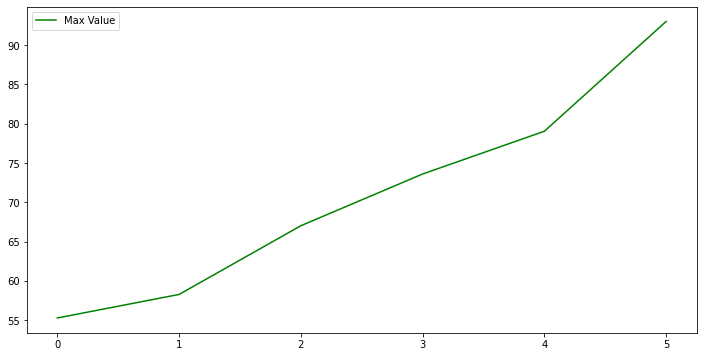

In [364]:
plt.figure(figsize = (12,6))
plt.plot(final_pont_max, color = 'green', label = 'Max Value')

plt.legend()
plt.show()

In [45]:
gene = genetic(n_geracoes = 10, populacao = 20)

Created


In [46]:
gene.evolucao(cromoT)

GERAÇÃO:  0
Cromossomos:  [[3, 2, 2, 4], [1, 4, 2, 2], [4, 3, 4, 2], [4, 2, 4, 4], [3, 2, 4, 2], [3, 2, 4, 1], [4, 5, 2, 2], [3, 1, 2, 2], [3, 2, 2, 4], [4, 3, 3, 4]]
Pontuações:  [44.7, 22.1, 28.35, 47.7, 24.6, 14.8, 30.1, 24.6, 44.7, 48.2]
Geracao:  0  - Taxa:  0.4
[4, 3, 3, 4]
--------
Não parou
GERAÇÃO:  1
Cromossomos:  [[3, 2, 3, 3], [3, 2, 3, 4], [3, 3, 2, 4], [3, 2, 2, 4], [3, 2, 3, 4], [5, 2, 3, 4], [4, 3, 2, 3], [4, 2, 2, 4], [4, 3, 3, 3], [3, 3, 2, 3], [3, 3, 3, 4], [4, 2, 2, 4], [3, 3, 2, 4], [4, 2, 2, 3], [4, 2, 2, 3], [4, 3, 2, 4], [4, 3, 2, 4], [5, 3, 2, 4], [3, 3, 3, 4], [3, 3, 3, 2], [4, 3, 3, 4]]
Pontuações:  [34.567, 44.367, 45.2, 44.7, 44.367, 52.367, 38.9, 48.2, 38.4, 35.4, 44.7, 48.2, 45.2, 38.4, 38.4, 48.7, 48.7, 53.2, 44.7, 25.1, 48.2]
Geracao:  1  - Taxa:  0.45
[5, 3, 2, 4]
--------
Não parou
GERAÇÃO:  2
Cromossomos:  [[4, 2, 3, 4], [3, 3, 1, 5], [4, 2, 2, 2], [3, 2, 2, 4], [3, 3, 2, 2], [4, 2, 1, 5], [6, 3, 2, 3], [5, 3, 1, 2], [4, 3, 2, 4], [4, 2, 2, 3], [5, 2

In [47]:
print(gene.cromo)
print('--- --- --- ---')
print(gene.pontos)
print('--- --- --- ---')
print(gene.final_pont_max)
print('--- --- --- ---')
print(gene.pontos_max)
print('--- --- --- ---')
print(gene.id_max)
print('--- --- --- ---')
print(gene.vencedor)

[[6, 1, 1, 6], [1, 2, 1, 7], [9, 1, 1, 7], [2, 1, 1, 10], [10, 1, 1, 7], [10, 1, 1, 4], [8, 1, 1, 6], [8, 1, 1, 6], [8, 1, 1, 6], [5, 1, 1, 7], [8, 1, 1, 8], [4, 1, 1, 8], [5, 1, 1, 10], [4, 1, 1, 9], [5, 2, 1, 10], [5, 1, 1, 10], [3, 2, 1, 10], [3, 1, 1, 9], [6, 2, 1, 6], [4, 2, 1, 7], [6, 2, 1, 8], [8, 1, 1, 7], [9, 1, 1, 6]]
--- --- --- ---
[77.8, 71.1, 89.9, 99.0, 80.4, 90.2, 91.8, 91.8, 91.8, 82.1, 88.6, 87.4, 88.5, 97.2, 87.5, 88.5, 95.5, 93.7, 78.8, 78.6, 98.4, 98.4, 99.7]
--- --- --- ---
[48.2, 53.2, 64.5, 79.8, 85.3, 97.4, 97.4, 99.7, 99.7]
--- --- --- ---
99.7
--- --- --- ---
22
--- --- --- ---
[9, 1, 1, 6]
